In [17]:
#сумма ai*sin(xi*ai)
import math
import numpy
function_inputs = [5, 7,-0.2, -4.5, 6, -0.1, 8]
desired_output = 10

def fitness_func(solution, solution_idx):
    s = [math.sin(function_inputs[i]*solution[i]) for i in range(len(function_inputs))]
    output = numpy.sum(solution*s)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

In [18]:
import pygad
num_generations = 100 
num_parents_mating = 10

sol_per_pop = 20 
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

In [19]:
ga_instance.run()

Generation = 1
Fitness    = 0.2610587843784333
Change     = 0.2610587843784333
Generation = 2
Fitness    = 0.31094889864547487
Change     = 0.049890114267041596
Generation = 3
Fitness    = 0.5797452052007837
Change     = 0.2687963065553088
Generation = 4
Fitness    = 0.5797452052007837
Change     = 0.0
Generation = 5
Fitness    = 0.7954653480034826
Change     = 0.2157201428026989
Generation = 6
Fitness    = 0.7954653480034826
Change     = 0.0
Generation = 7
Fitness    = 2.092599542286481
Change     = 1.2971341942829984
Generation = 8
Fitness    = 2.092599542286481
Change     = 0.0
Generation = 9
Fitness    = 2.092599542286481
Change     = 0.0
Generation = 10
Fitness    = 2.364550837748978
Change     = 0.2719512954624972
Generation = 11
Fitness    = 2.364550837748978
Change     = 0.0
Generation = 12
Fitness    = 2.7146969859934624
Change     = 0.3501461482444843
Generation = 13
Fitness    = 247.68785916191231
Change     = 244.97316217591884
Generation = 14
Fitness    = 247.6878591619123

Parameters of the best solution : [-1.63946159  2.926363    1.69148524  3.86875863  0.12365399  0.42390851
  3.99963428]
Fitness value of the best solution = 6858.137395911089
Index of the best solution : 0
Predicted output based on the best solution : 27.23612959185757
Best fitness value reached after 81 generations.


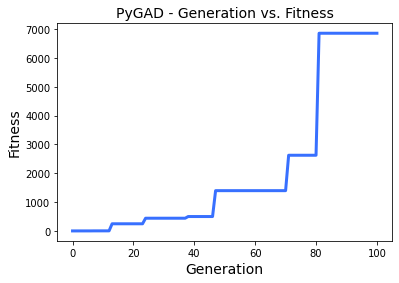

''

In [20]:
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))


filename = 'genetic'
ga_instance.save(filename=filename)


loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()
;
